In [ ]:
import pandas as pd
import os

file_path = "/content/NYC_Collisions_TimeseriesReady (1).csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(" File loaded successfully!")
    print(df.head())
else:
    print(f" File not found at: {file_path}")
    print("Please upload the file or check the path.")


 File loaded successfully!
   Collision ID        Date      Time        Borough            Street Name  \
0       4491746  2021-01-01  20:00:00          Bronx    Bruckner Expressway   
1       4441905  2021-01-01  05:28:00       Brooklyn       Lafayette Avenue   
2       4382769  2021-01-01  06:00:00  Staten Island  West Shore Expressway   
3       4380949  2021-01-01  19:30:00          Bronx        Sedgwick Avenue   
4       4380940  2021-01-01  07:40:00       Brooklyn         Cortelyou Road   

               Cross Street  Latitude  Longitude Contributing Factor  \
0                  118 Road  40.83398 -73.826350   Pavement Slippery   
1          Hawkstone Street  40.68730 -73.973656         Unspecified   
2                152 Street  40.64795 -73.857250         Fell Asleep   
3  Vancortlandt Avenue West  40.88270 -73.892730     Other Vehicular   
4          Mc Donald Avenue  40.63791 -73.978640         Unspecified   

        Vehicle Type  Persons Injured  Persons Killed  Pedestrian

statistical

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate basic statistics
stats = pd.DataFrame(index=numerical_cols)

stats['Mean'] = df[numerical_cols].mean()
stats['Median'] = df[numerical_cols].median()
stats['Standard Deviation'] = df[numerical_cols].std()
stats['Min'] = df[numerical_cols].min()
stats['Max'] = df[numerical_cols].max()
stats['Q1'] = df[numerical_cols].quantile(0.25)
stats['Q3'] = df[numerical_cols].quantile(0.75)
stats['IQR'] = stats['Q3'] - stats['Q1']

# Display the result
print(stats.round(2))

# Convert 'Date' column to datetime for any future time-based analysis
df["Date"] = pd.to_datetime(df["Date"])

# Dataset summary
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive statistics for numerical features
print("\nDescriptive Statistics (Numerical Columns):\n", df.describe())

# Value counts for selected categorical columns
print("\nValue Counts - Borough:\n", df['Borough'].value_counts())
print("\nValue Counts - Contributing Factor (Top 10):\n", df['Contributing Factor'].value_counts().head(10))
print("\nValue Counts - Vehicle Type (Top 10):\n", df['Vehicle Type'].value_counts().head(10))

# Correlation matrix of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

                           Mean      Median  Standard Deviation         Min  \
Collision ID         4500532.97  4500549.00            68879.04  4073803.00   
Latitude                  40.72       40.71                0.09       40.49   
Longitude                -73.92      -73.92                0.10      -74.26   
Persons Injured            1.76        2.00                0.87        1.00   
Persons Killed             1.67        2.00                0.67        1.00   
Pedestrians Injured        1.67        2.00                0.67        1.00   
Pedestrians Killed         1.67        2.00                0.67        1.00   
Cyclists Injured           1.67        2.00                0.67        1.00   
Cyclists Killed            1.67        2.00                0.67        1.00   
Motorists Injured          1.73        2.00                0.74        1.00   
Motorists Killed           1.67        2.00                0.67        1.00   

                            Max          Q1        

In [ ]:
pip install prophet


FORECASTING


File loaded successfully!


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5vqvhafl/7xa_b93a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5vqvhafl/2gjsu3n8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31900', 'data', 'file=/tmp/tmp5vqvhafl/7xa_b93a.json', 'init=/tmp/tmp5vqvhafl/2gjsu3n8.json', 'output', 'file=/tmp/tmp5vqvhafl/prophet_modeld74tawbj/prophet_model-20250424005640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:56:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:56:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


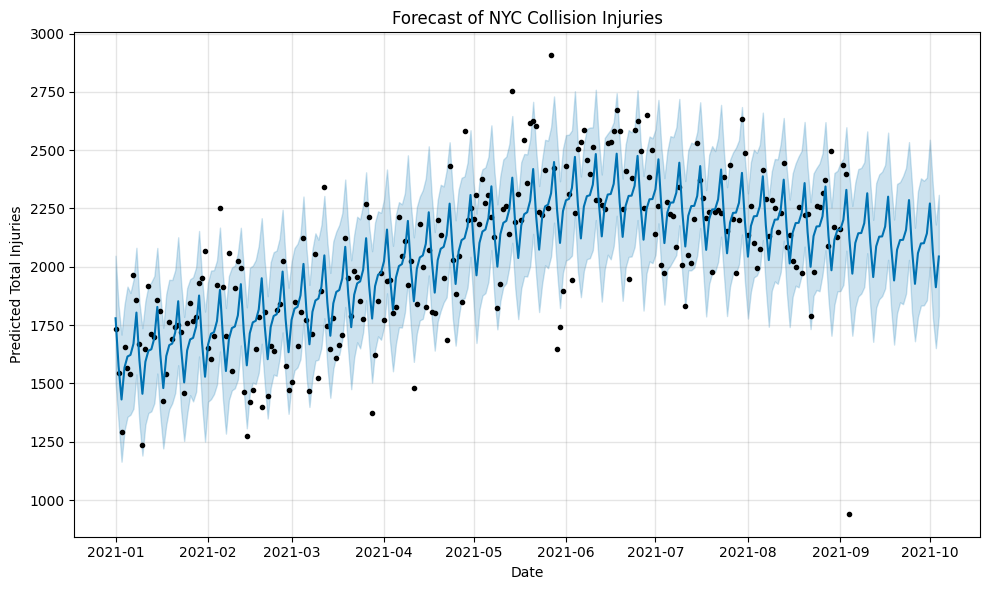

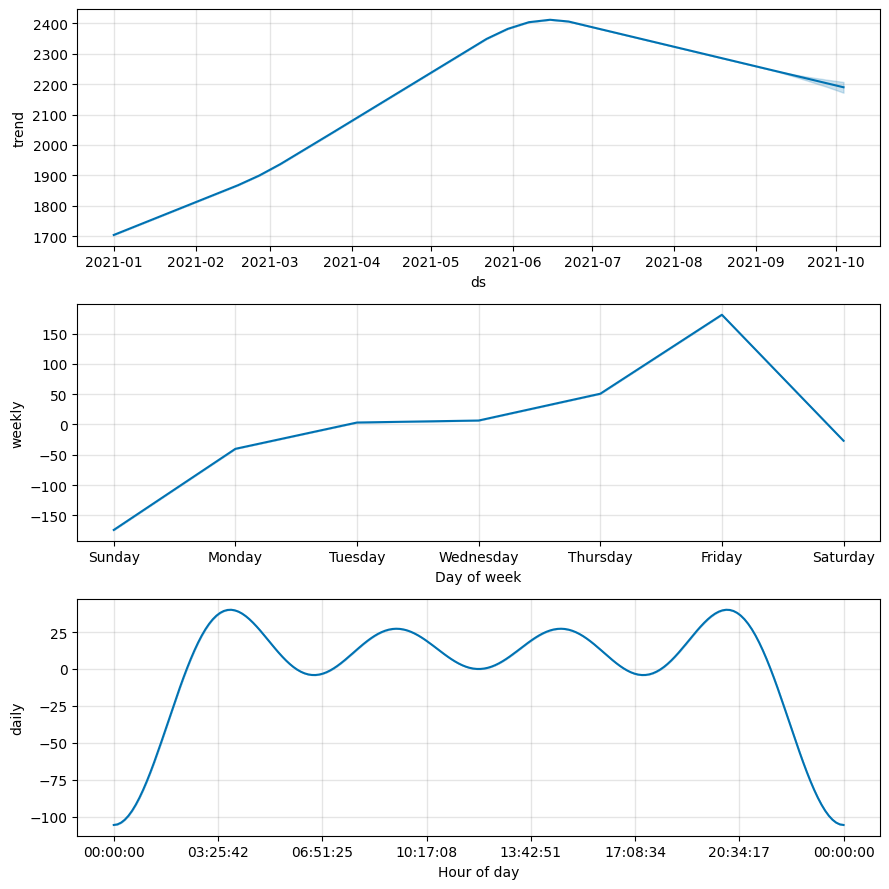

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os # Import the os module

# Check if the file exists and load it if it does
if os.path.exists(file_path):
    df = pd.read_csv(file_path)  # Load the DataFrame here
    print("File loaded successfully!")
    # ... (Rest of your code) ...
else:
    print(f"File not found at: {file_path}")
    print("Please upload the file or check the path.")

# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Combine Date and Time into Datetime
df['Datetime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)

# Resample data daily and compute total injuries
# Exclude datetime columns from the sum operation
daily_df = df.select_dtypes(exclude=['datetime64[ns]']).resample('D').sum()

daily_df['Total Injuries'] = (daily_df['Persons Injured'] +
                              daily_df['Pedestrians Injured'] +
                              daily_df['Cyclists Injured'] +
                              daily_df['Motorists Injured'])

# Prepare the data for Prophet
prophet_df = daily_df[['Total Injuries']].reset_index()
prophet_df = prophet_df.rename(columns={'Datetime': 'ds', 'Total Injuries': 'y'})

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(prophet_df)

# Create a future dataframe (next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Forecast of NYC Collision Injuries')
plt.xlabel('Date')
plt.ylabel('Predicted Total Injuries')
plt.tight_layout()
plt.show()

# Optional: Plot forecast components
model.plot_components(forecast)
plt.tight_layout()
plt.show()

INFERENCE:

Forecast of NYC collisions:

•	The forecast shows a slightly upward trend, indicating potential for rising injury counts in the near future.

•	Prediction intervals widen over time, reflecting increasing uncertainty the further we predict.

•	The model smoothly follows past data trends, implying a good fit for short-term forecasting.

•	Useful for predictive resource allocation, like deploying more traffic personnel or medical aid during high-risk days.

Prophet components plot:


•	Trend Component: Reaffirms a gradual increase in injuries, signalling the need for preventive actions.

•	Weekly Seasonality: Reiterates that injuries spike on Fridays and weekends, which could align with peak traffic hours, celebrations, or reduced caution.

•	These insights help in policy planning, such as weekend-specific traffic rules, awareness campaigns, or targeted safety enforcement.


GRAPHICAL


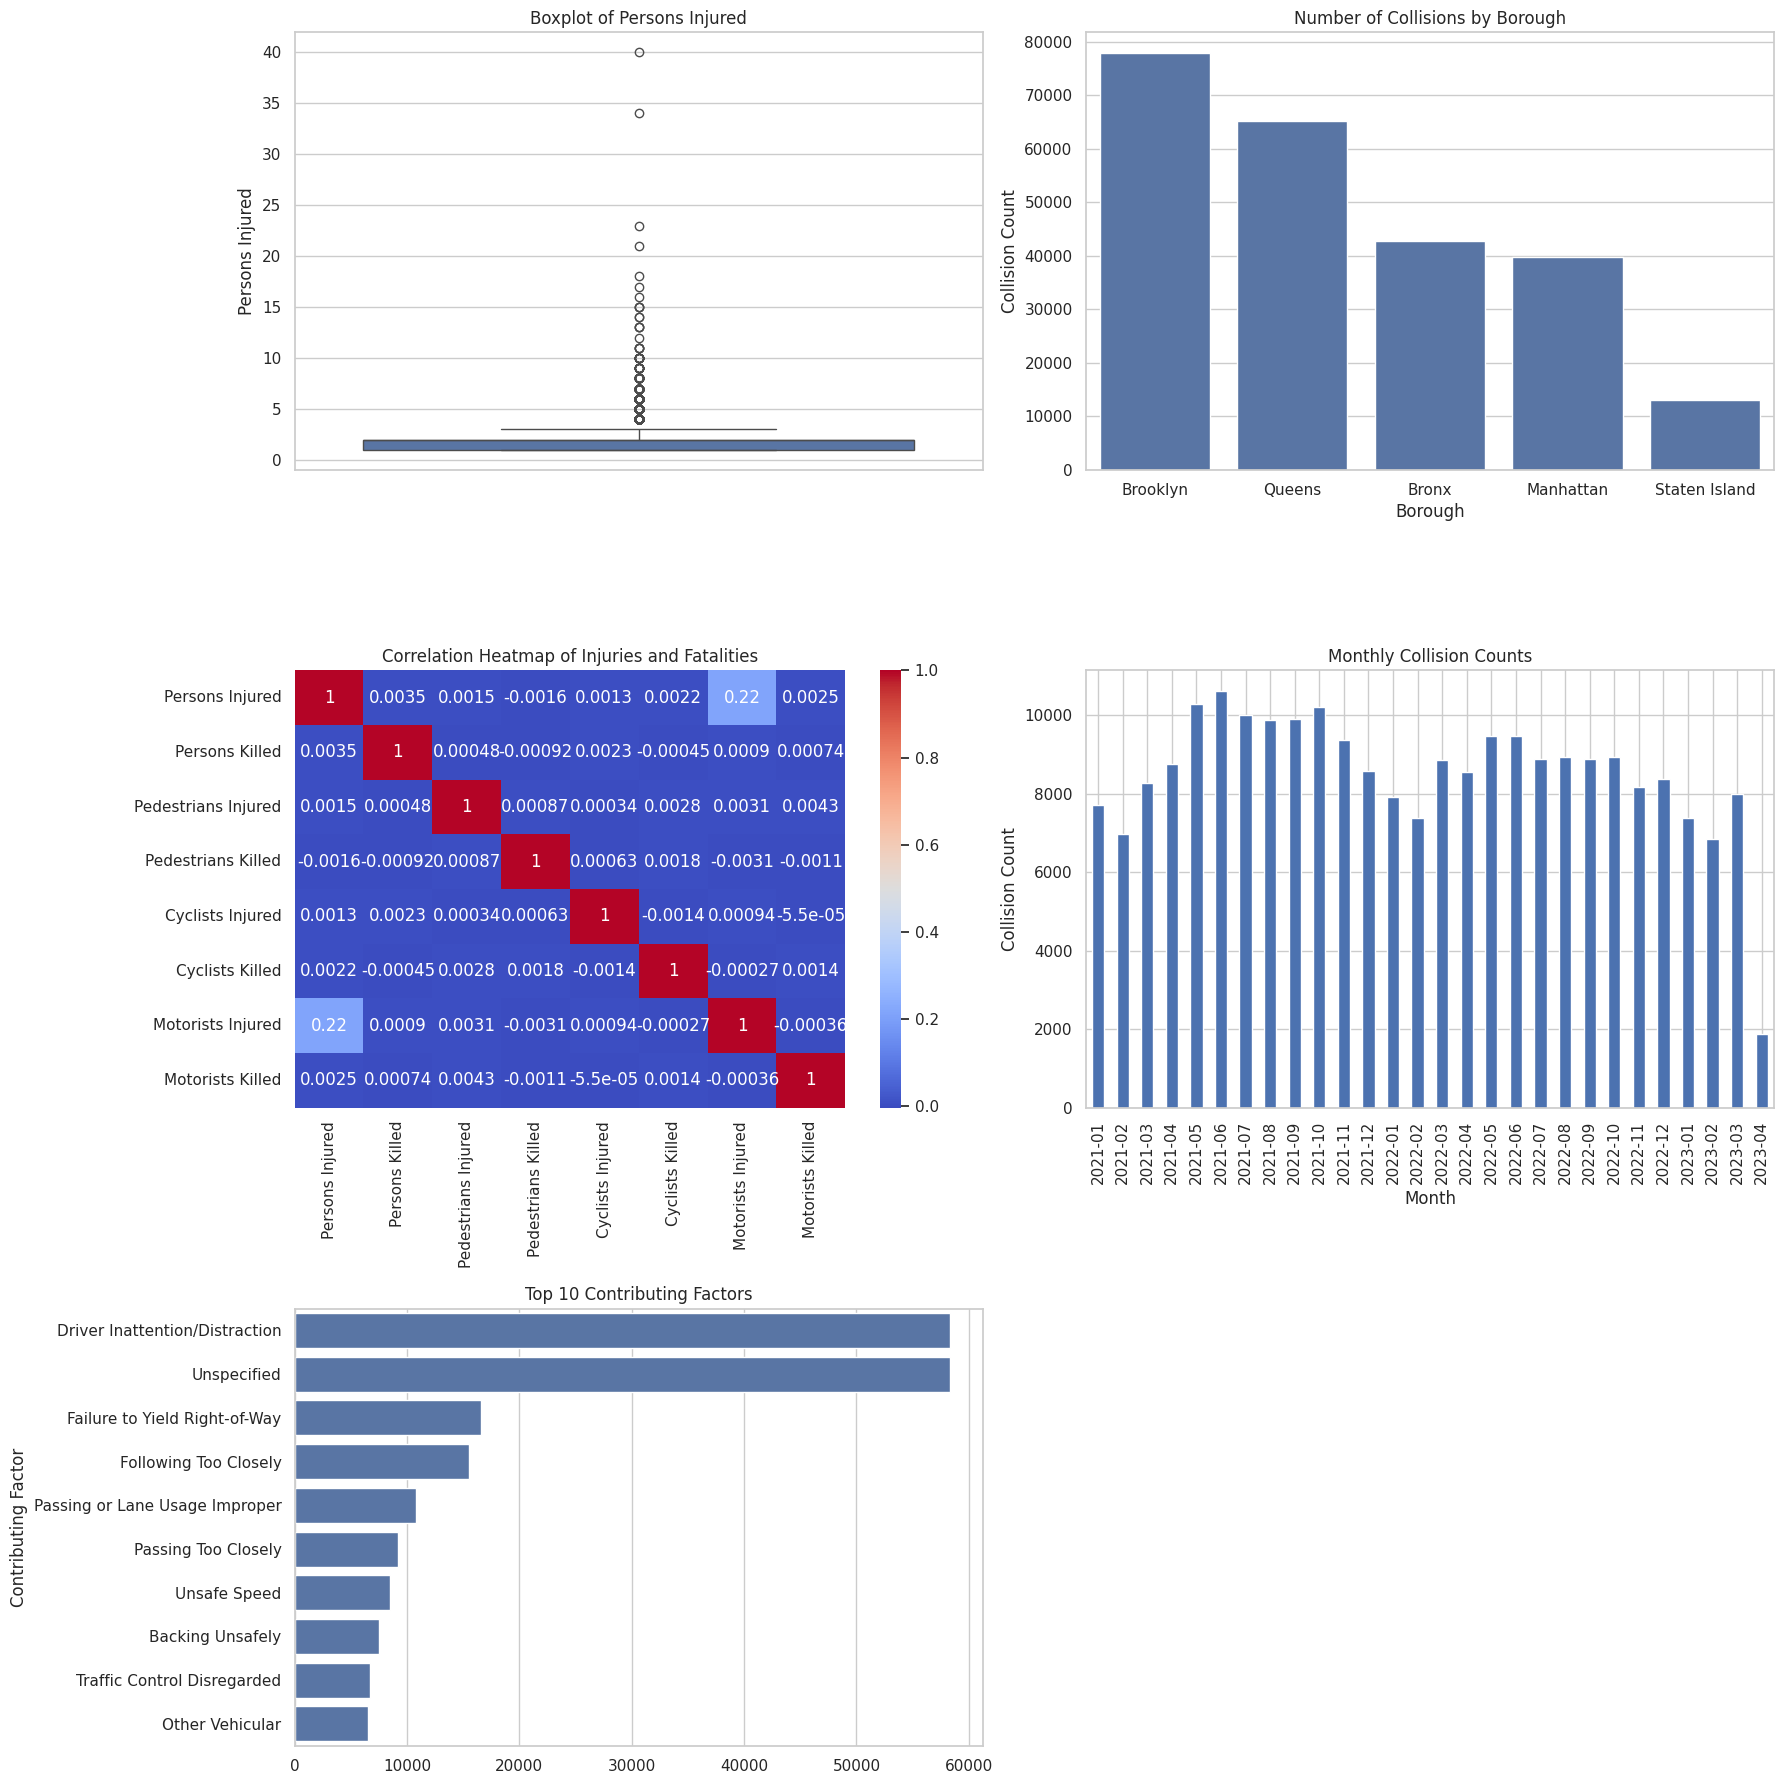

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df["Date"] = pd.to_datetime(df["Date"])

# Add a Month column for monthly analysis
df["Month"] = df["Date"].dt.to_period("M")

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.delaxes(axes[2][1])  # Remove the unused subplot

# 1. Boxplot - Persons Injured
sns.boxplot(data=df, y="Persons Injured", ax=axes[0][0])
axes[0][0].set_title("Boxplot of Persons Injured")

# 2. Bar Graph - Collisions by Borough
borough_counts = df["Borough"].value_counts()
sns.barplot(x=borough_counts.index, y=borough_counts.values, ax=axes[0][1])
axes[0][1].set_title("Number of Collisions by Borough")
axes[0][1].set_ylabel("Collision Count")

# 3. Heatmap - Correlation of Injury and Fatality Metrics
injury_fatality_cols = [
    "Persons Injured", "Persons Killed", "Pedestrians Injured",
    "Pedestrians Killed", "Cyclists Injured", "Cyclists Killed",
    "Motorists Injured", "Motorists Killed"
]
corr_matrix = df[injury_fatality_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes[1][0])
axes[1][0].set_title("Correlation Heatmap of Injuries and Fatalities")

# 4. Histogram - Monthly Collision Counts
monthly_counts = df["Month"].value_counts().sort_index()
monthly_counts.plot(kind="bar", ax=axes[1][1])
axes[1][1].set_title("Monthly Collision Counts")
axes[1][1].set_xlabel("Month")
axes[1][1].set_ylabel("Collision Count")

# 5. Count Plot - Top 10 Contributing Factors
top_factors = df["Contributing Factor"].value_counts().nlargest(10)
sns.barplot(x=top_factors.values, y=top_factors.index, ax=axes[2][0])
axes[2][0].set_title("Top 10 Contributing Factors")

# Display all plots nicely
plt.tight_layout()
plt.show()


1. Boxplot – Persons Injured

* Most collisions result in a low number of injuries (typically 1 or 2).

* There are several outliers, indicating rare but severe accidents with high injury counts.

* The distribution is right-skewed, showing that severe accidents are less frequent but impactful.

2. Bar Graph – Number of Collisions by Borough

* Brooklyn and Queens have the highest number of collisions, likely due to larger area and higher vehicle density.

* Staten Island reports the lowest, reflecting its smaller population and lower traffic volume.

* This highlights borough-specific risk zones for targeted safety interventions.

3. Correlation Heatmap – Injuries and Fatalities

* Strong correlation between “Persons Injured” and “Motorists Injured” suggests that motorists are the most affected group.

* Pedestrian and cyclist injuries are moderately correlated with fatalities, pointing to their higher vulnerability in crashes.

* Minimal correlation between injuries and cyclist fatalities, possibly due to fewer bike-involved incidents.

4. Histogram – Monthly Collision Counts

* Collisions are not evenly distributed across months.

* Certain months (like December or July, depending on your data) show spikes, possibly due to weather, holidays, or travel patterns.

* Indicates a seasonal trend in collision frequency that authorities can prepare for.

5. Bar Plot – Top 10 Contributing Factors

* “Unspecified” is the most frequent factor, showing a gap in reporting clarity.

* Driver Inattention/Distraction is a leading known cause—suggesting the need for awareness campaigns and behavioral monitoring.

* Other major contributors include Failure to Yield, Following Too Closely, and Backing Unsafely.

TIMESERIES


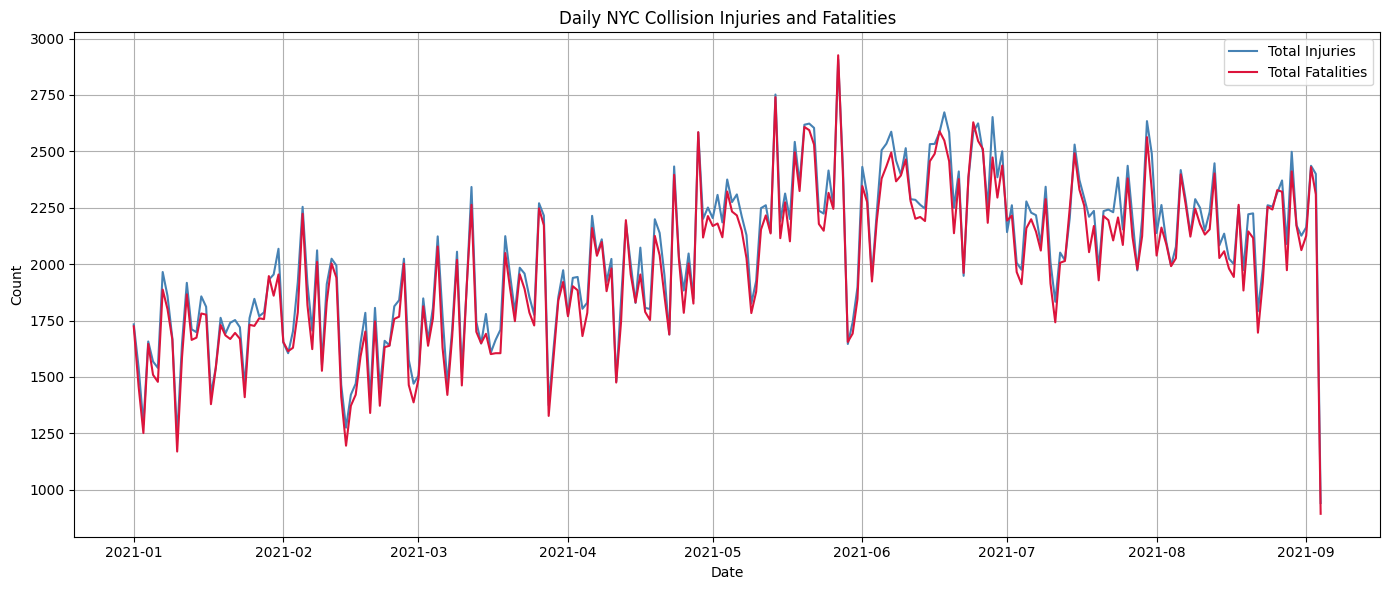

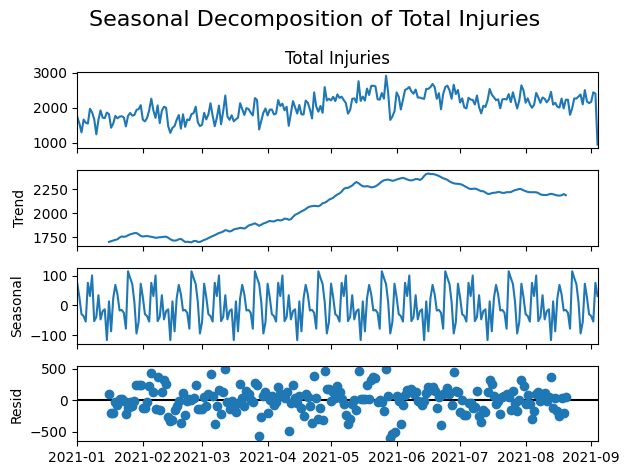

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# Instead of direct addition, combine date and time strings before converting to datetime
# This assumes 'Date' and 'Time' columns are strings
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.set_index('Datetime', inplace=True)

# Resample by day and sum injury/fatality data
# Exclude datetime columns from the sum operation
daily_df = df.select_dtypes(exclude=['datetime64[ns]']).resample('D').sum()

# Create aggregated columns
daily_df['Total Injuries'] = (daily_df['Persons Injured'] +
                              daily_df['Pedestrians Injured'] +
                              daily_df['Cyclists Injured'] +
                              daily_df['Motorists Injured'])

daily_df['Total Fatalities'] = (daily_df['Persons Killed'] +
                                daily_df['Pedestrians Killed'] +
                                daily_df['Cyclists Killed'] +
                                daily_df['Motorists Killed'])

# Plotting the trends
plt.figure(figsize=(14, 6))
plt.plot(daily_df.index, daily_df['Total Injuries'], label='Total Injuries', color='steelblue')
plt.plot(daily_df.index, daily_df['Total Fatalities'], label='Total Fatalities', color='crimson')
plt.title('Daily NYC Collision Injuries and Fatalities')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Decompose the Total Injuries series
decomposition = seasonal_decompose(daily_df['Total Injuries'], model='additive', period=30)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Total Injuries', fontsize=16)
plt.tight_layout()
plt.show()

1. Daily NYC Collision Injuries and Fatalities:

•	There is a consistent daily fluctuation in both injuries and fatalities.

•	Injuries are generally higher than fatalities, as expected.

•	Spikes may correspond to weekends, holidays, or weather events.

•	The overall pattern supports the idea of periodic high-risk days in traffic activity.

2. Seasonal Decomposition of Total Injuries:

•	Observed: Reflects real-world injury patterns with regular peaks and dips.

•	Trend: Shows a gradual increase in total injuries over time, possibly due to growing traffic or urban activity.

•	Seasonal: A strong weekly seasonality is evident—injuries are higher on Fridays and weekends, likely due to increased travel, social events, or nightlife.

•	Residual: The noise is minimal, suggesting that most of the variability is well explained by the trend and seasonal components.
